# Regression Multi Variable 

In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()

import pandas as pd

boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [2]:
df_boston.shape

(506, 13)

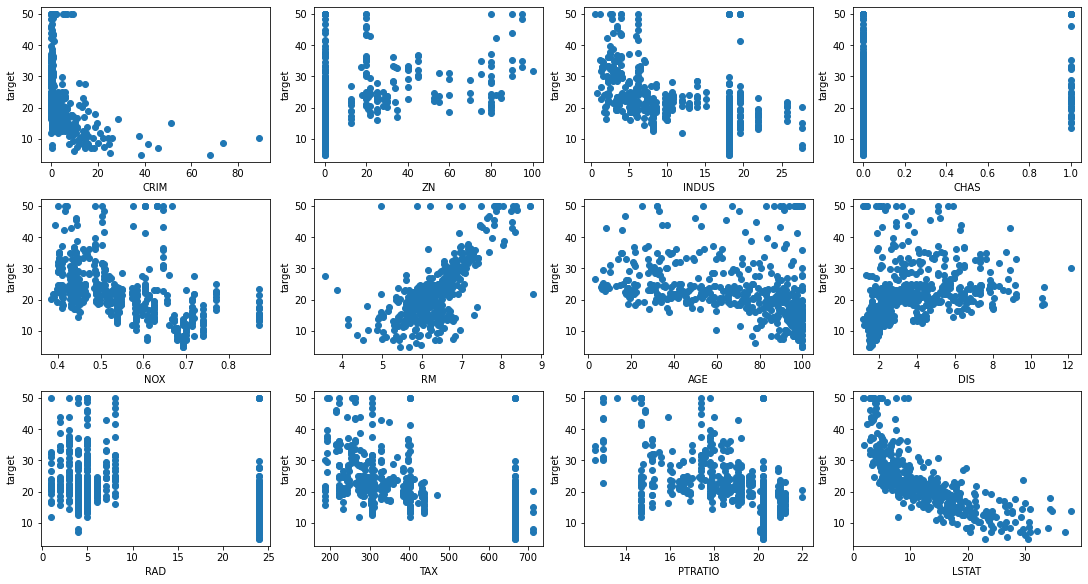

In [3]:
# visualize the relationship between the features and the response using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')


fig, axes = plt.subplots(3, 4,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns[:-1]:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],df_boston.target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1
    
plt.show()


<AxesSubplot:xlabel='LSTAT', ylabel='target'>

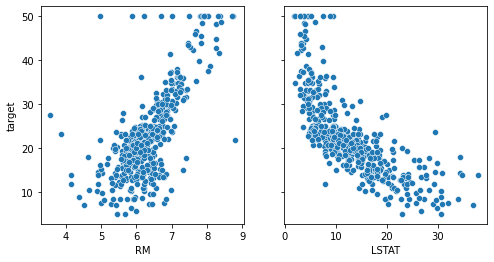

In [4]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])
sns.scatterplot(x=df_boston['RM'], y=df_boston.target, ax=ax1)
sns.scatterplot(x=df_boston['LSTAT'], y=df_boston.target, ax=ax2)


<AxesSubplot:xlabel='LSTAT', ylabel='target'>

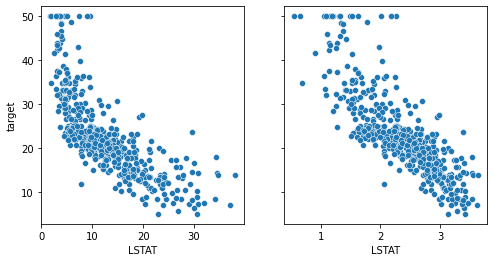

In [5]:
import numpy as np 
log_LSTAT=np.log(df_boston['LSTAT'])

log_CRIM=np.log(df_boston['CRIM'])

# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])
sns.scatterplot(x=df_boston['LSTAT'], y=df_boston.target, ax=ax1)
sns.scatterplot(x=log_LSTAT, y=df_boston.target, ax=ax2)
#sns.scatterplot(x=log_CRIM, y=df_boston.target, ax=ax1)                          

<AxesSubplot:xlabel='target', ylabel='Count'>

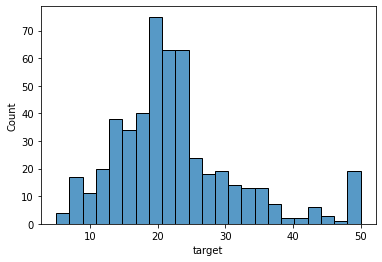

In [6]:
sns.histplot(data=df_boston, x='target')


In [7]:
#We can compute the correlation 
df_boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47


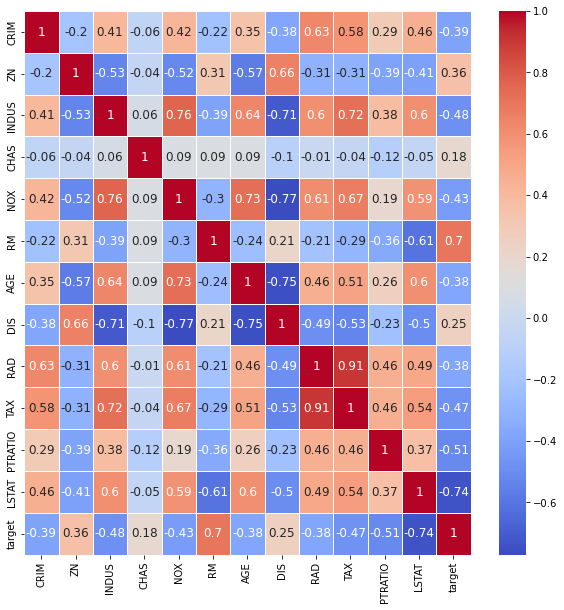

In [8]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_boston.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

###  Brief discussion on correlation

In [9]:
import pandas as pd
df_q = pd.read_csv("quadratic.csv") 

df_q.columns

Index(['x', 'y'], dtype='object')

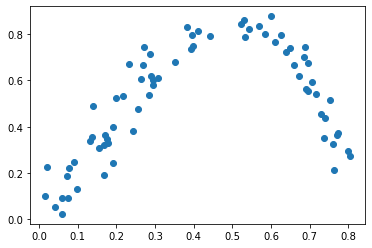

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_q["x"], df_q["y"], 'o')

In [11]:
df_q.corr()

,x,y
x,1.000000,0.448615
y,0.448615,1.000000


In [12]:
import math 
df_q["x2"]=df_q["x"].apply(lambda x: -(x-0.5)**2)

In [13]:
df_q

,x,y,x2
0,0.154537,0.308410,-0.119345
1,0.175968,0.346179,-0.104997
2,0.140914,0.488696,-0.128943
3,0.265104,0.604524,-0.055176
4,0.232524,0.669098,-0.071544
...,...,...,...
67,0.255167,0.477284,-0.059943
68,0.198173,0.522641,-0.091099
69,0.285703,0.535777,-0.045923
70,0.306991,0.611045,-0.037253


In [14]:
df_q.corr()

,x,y,x2
x,1.000000,0.448615,0.663367
y,0.448615,1.000000,0.895750
x2,0.663367,0.895750,1.000000


In [15]:
from sklearn.linear_model import LinearRegression

simple_regr=LinearRegression()
simple_regr.fit(df_q[["x2"]], df_q["y"])

y_pred=simple_regr.predict(df_q[["x2"]])


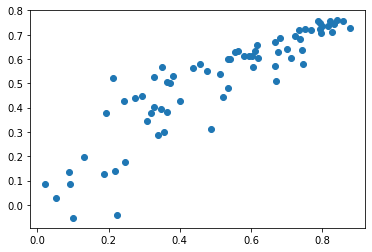

In [16]:
plt.plot(df_q["y"],y_pred,'o')

In [17]:
from sklearn import metrics

print("r2: ",metrics.r2_score(df_q["y"], y_pred ))

r2:  0.8023680935251123


## Select data

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target variables
X = df_boston.iloc[:,:-1] #if I want to use all variables
y = df_boston.iloc[:,-1]

#choose your approach:
#X = df_boston.iloc[:,[4,5,10,11,12]] #if I want to use only some variable
#X = X.drop(['INDUS','CHAS','AGE'], axis=1) #if I want to drop some columns
#X = X[['RM','LSTAT']]#if I want to select some columns
X["LSTAT2"] = np.log(X.LSTAT) #if I want to log transform the LSTAT variable 
X["CRIM2"] = np.log(X.CRIM) #if I want to log transform the LSTAT variable 

X = X.drop(['LSTAT','CRIM'], axis=1)

columns = X.columns #column names

In [19]:
#X=X[['RM','LSTAT2']]

# Filter the unusual observation
X=X[y<50]
y=y[y<50]

In [20]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: target, dtype: float64

In [21]:
X.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT2,CRIM2
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,1.605430,-5.064036
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,2.212660,-3.600502
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,1.393766,-3.601235
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,1.078410,-3.430523
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,1.673351,-2.672924


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [23]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out

#gs.score(X_train, y_train)
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.768207 using {}
0.768207 (0.007691) with: {}


0.7971745759177649

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

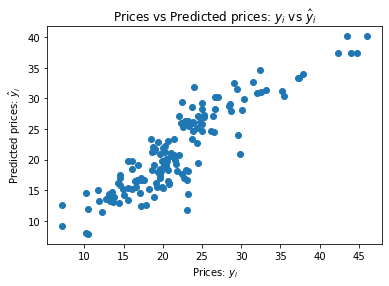

In [24]:
plt.scatter(y_test, gs.predict(X_test))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [25]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

gs.best_estimator_.coef_

#import pandas as pd
#pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  21.51395327278904


array([ 0.01252508, -0.11132172,  0.07932177, -1.34263216,  1.80335934,
       -0.09602504, -1.93822741,  1.50245446, -1.95531955, -1.87781981,
       -3.99589781, -0.53886455])

In [26]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error

print("MSE train: ", mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, gs.predict(X_test)))

MSE train:  13.853042355438996
MSE test:  10.818501061966423


In [27]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",metrics.r2_score(y_train, gs.predict(X_train)))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  2.7917837353110597
MSE train:  13.853042355438996
RMSE train:  3.7219675382032813
r2:  0.7879174890238101
MAE test:  2.5736189743850146
MSE test:  10.818501061966423
RMSE test:  3.2891489874991104
r2:  0.7971745759177649


In [28]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    3.430000e+02
mean    -1.035777e-17
std      3.727405e+00
min     -1.295913e+01
25%     -1.801686e+00
50%      3.844002e-01
75%      2.423864e+00
max      1.075971e+01
Name: target, dtype: float64

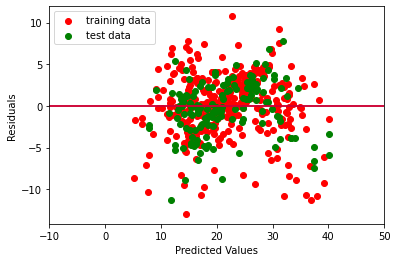

In [29]:
plt.scatter(gs.predict(X_train),error_train, c="r", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="b")
plt.hlines(y=error_train.mean(), xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [30]:
nb_error_train = np.array(error_train).flatten()

error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()


/home/andrea/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


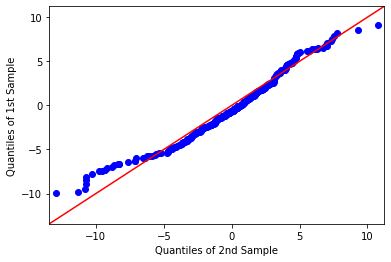

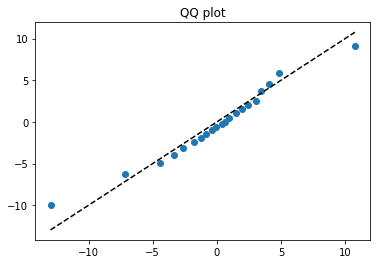

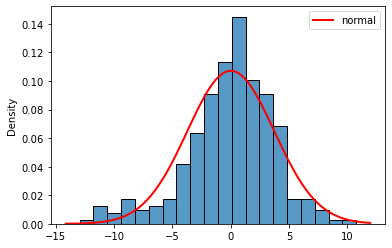

In [31]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt

# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error_train))

# qq-plot using statsmodels
qqplot_2samples(test_dist,np.array(nb_error_train).flatten(), line='45')
plt.show()

# We create the percentiles for both distributions
test_dist.sort()
percs = np.linspace(0,100,21)
q_a = np.percentile(nb_error_train, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()


# plot the distribution and compare with a normal

ax = sns.histplot(nb_error_train, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

#plt.hist(nb_error_train,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [32]:
# Kolmogorov-Smirnov Test
from scipy import stats
print(stats.kstest(scaled_error_train, "norm"))
print(stats.kstest(nb_error_train, test_dist))
# normality tests use a (0,1) normal distribution 
# D'agostino normality test
print(stats.normaltest(scaled_error_train))
# Shapiro test of normality
print(stats.shapiro(scaled_error_train))

KstestResult(statistic=0.07972566114627083, pvalue=0.024142664053594)
KstestResult(statistic=0.11078717201166181, pvalue=0.02962152628687936)
NormaltestResult(statistic=30.003323226245705, pvalue=3.0539445124972623e-07)
ShapiroResult(statistic=0.9685108065605164, pvalue=8.861634910317662e-07)


## Test parameters (statsmodels)

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we want to add a constant to our model 
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
est_fit.params

/home/andrea/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const      21.513953
ZN          0.012525
INDUS      -0.111322
CHAS        0.079322
NOX        -1.342632
RM          1.803359
AGE        -0.096025
DIS        -1.938227
RAD         1.502454
TAX        -1.955320
PTRATIO    -1.877820
LSTAT2     -3.995898
CRIM2      -0.538865
dtype: float64

In [34]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.55e-103
Time:                        10:00:19   Log-Likelihood:                -937.48
No. Observations:                 343   AIC:                             1901.
Df Residuals:                     330   BIC:                             1951.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5140      0.206    104.365      0.0